In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print("Size of the data : ", df.shape)

Size of the data :  (200, 5)


In [5]:
from sklearn.cluster import KMeans

### Segmentation using Age and Spending Score

In [6]:
X = df[["Age", "Spending Score (1-100)"]]
X.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


#### Model 1.  with k = 3

In [7]:
k_means = KMeans(n_clusters=3,random_state = 42)  # it divides 200 data into 3 categories so its giving labels in 0 1 2
k_means.fit(X)

KMeans(n_clusters=3, random_state=42)

In [8]:
#To get cluster centers
k_means.cluster_centers_

array([[43.05494505, 47.78021978],
       [42.95744681, 14.59574468],
       [29.56451613, 80.74193548]])

In [9]:
labels = k_means.labels_
labels

array([0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 2, 1, 2, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 0, 0,
       1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#### Visualizing the clusters

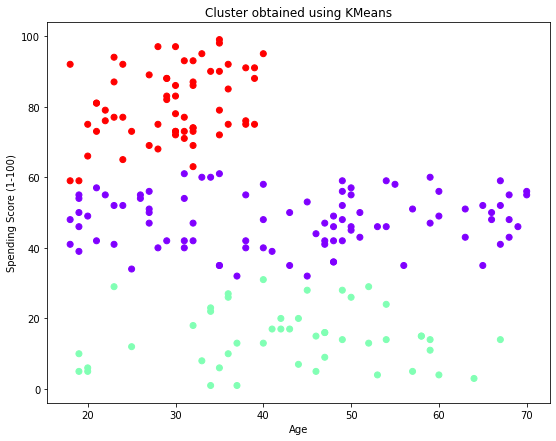

In [10]:
plt.figure(figsize = (9,7))
plt.scatter(X["Age"],X["Spending Score (1-100)"],c=k_means.labels_,cmap='rainbow')
plt.title("Cluster obtained using KMeans")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

#### Visualizing the clusters with their centroids

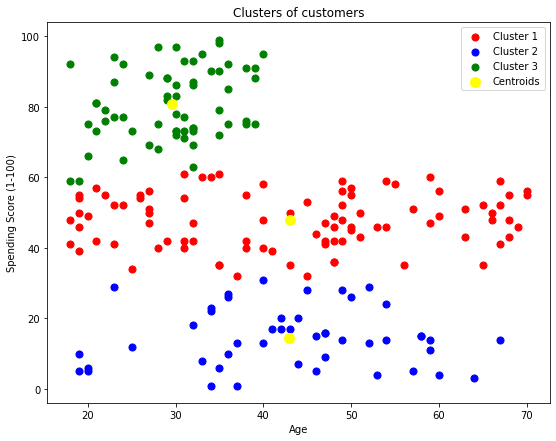

In [11]:
plt.figure(figsize = (9,7))
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### Assigning cluster to a query point 

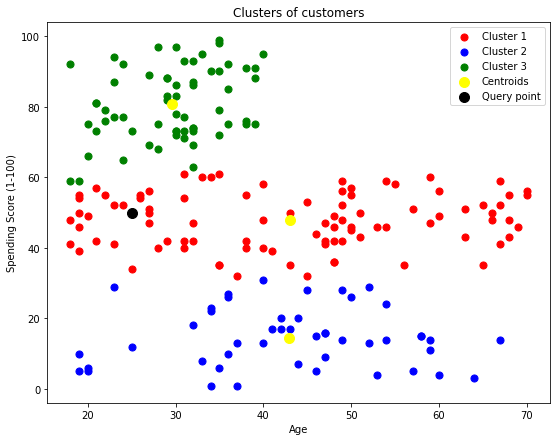

In [12]:
plt.figure(figsize = (9,7))
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s = 50, c = 'red', label = 'Cluster 1')  # label[0,0] 0th clusters age and 2nd is score
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s = 50, c = 'green', label = 'Cluster 3')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.scatter(25, 50, s = 100, c = 'black', label = 'Query point')
plt.title('Clusters of customers')
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [13]:
k_means.predict([[25,50]])

array([0])

#### Model 2. with k = 5

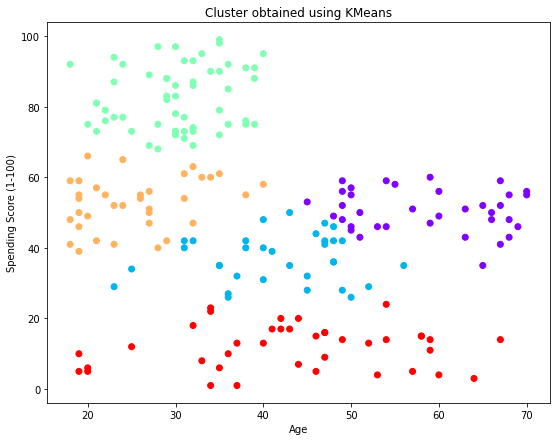

In [14]:
k_means_5 = KMeans(n_clusters=5,random_state = 42)
k_means_5.fit(X)
plt.figure(figsize = (9,7))
plt.scatter(df["Age"],df["Spending Score (1-100)"],c=k_means_5.labels_,cmap='rainbow')
plt.title("Cluster obtained using KMeans")
plt.xlabel("Age")
plt.ylabel("Spending Score (1-100)")
plt.show()

### Finding the optimal value of k

#### 1. Elbow Method

In [15]:
inertia = []
for i in range(1 , 15):
    k_means = (KMeans(n_clusters = i) )
    k_means.fit(X)
    inertia.append(k_means.inertia_)

In [16]:
inertia

[171535.5,
 75949.15601023019,
 45840.67661610867,
 28165.58356662934,
 23810.462233071365,
 19498.412640311188,
 15523.684014328755,
 13006.48362885102,
 11484.814123841843,
 10105.285393897324,
 9365.626865440488,
 8657.565027258604,
 7961.047726534618,
 7313.908775541736]

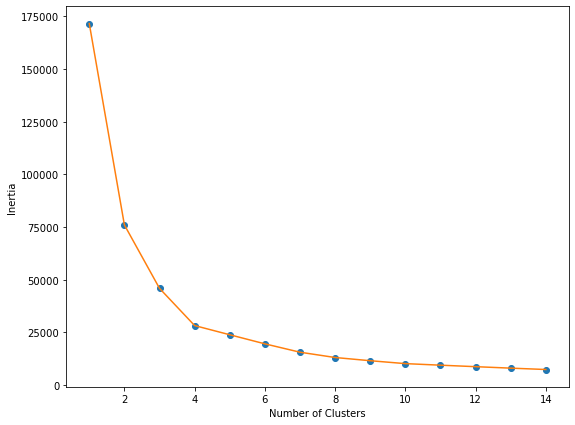

In [17]:
plt.figure(figsize = (9 ,7))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

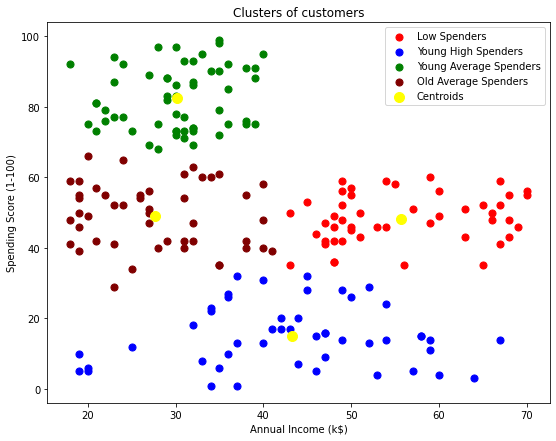

In [18]:
k_means_4 = KMeans(n_clusters=4,random_state = 42)
k_means_4.fit(X)
labels = k_means_4.labels_
plt.figure(figsize = (9,7))
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s = 50, c = 'red', label = 'Low Spenders')
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s = 50, c = 'blue', label = 'Young High Spenders')
plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s = 50, c = 'green', label = 'Young Average Spenders')
plt.scatter(X.values[labels == 3, 0], X.values[labels == 3, 1], s = 50, c = 'maroon', label = 'Old Average Spenders')
plt.scatter(k_means_4.cluster_centers_[:, 0], k_means_4.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

#### 2. Average Silhouette Method

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
s_score=[]
for i in range(2,15):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(X)
    avg_silhutte=silhouette_score(X,k_means.labels_)
    s_score.append(avg_silhutte)
    

In [19]:
s_score=[]
for i in range(2,15):
    k_means=KMeans(n_clusters=i,random_state=42)
    k_means.fit(X)
    avg_silhutte=silhouette_score(X,k_means.labels_)
    s_score.append(avg_silhutte)
    

In [20]:
s_scores = [] 
for i in range(2,15):
    k_means = KMeans(n_clusters=i, random_state = 42)
    k_means.fit(X)
    silhouette_avg = silhouette_score(X, k_means.labels_)
    s_scores.append(silhouette_avg)

In [21]:
s_scores

[0.4692341232501655,
 0.45300127016521263,
 0.49973941540141753,
 0.43350225495428363,
 0.4376965763059772,
 0.42313509747504796,
 0.43215030177487107,
 0.41485342159923116,
 0.4141899863508767,
 0.39306448028767604,
 0.3970633657674563,
 0.4151644961555101,
 0.3952221377611151]

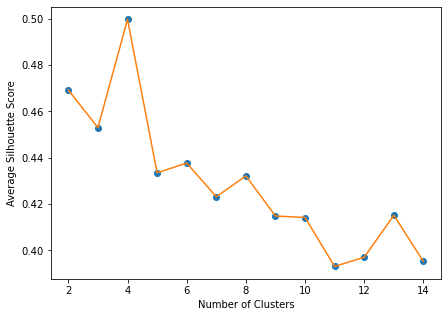

In [22]:
plt.figure(figsize = (7 ,5))
plt.plot(np.arange(2 , 15) , s_scores , 'o')
plt.plot(np.arange(2 , 15) , s_scores , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Average Silhouette Score')
plt.show()

### Segmentation using Annual Income and Spending Score

In [23]:
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [24]:
inertia = []
for i in range(1, 15):
    k_means = (KMeans(n_clusters = i) )
    k_means.fit(X)
    inertia.append(k_means.inertia_)

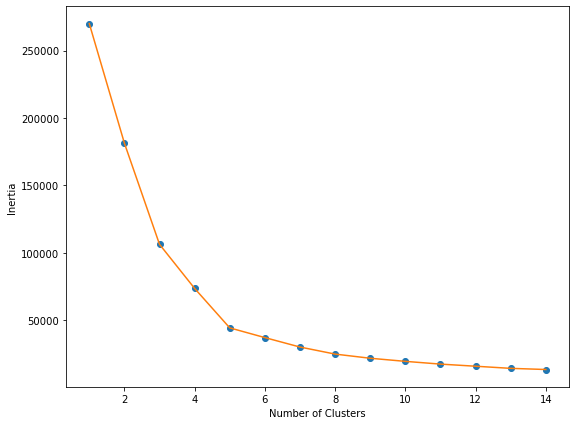

In [25]:
(plt.figure(figsize = (9 ,7))
plt.plot(np.arange(1 , 15) , inertia , 'o')
plt.plot(np.arange(1 , 15) , inertia , '-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

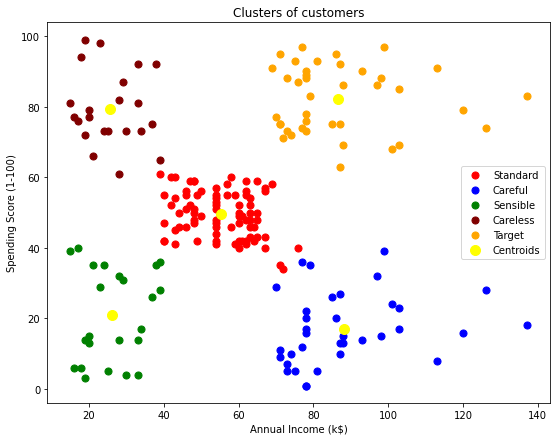

In [26]:
k_means = KMeans(n_clusters=5,random_state = 42)
k_means.fit(X)
labels = k_means.labels_
plt.figure(figsize = (9,7))
plt.scatter(X.values[labels == 0, 0], X.values[labels == 0, 1], s = 50, c = 'red', label = 'Standard')
plt.scatter(X.values[labels == 1, 0], X.values[labels == 1, 1], s = 50, c = 'blue', label = 'Careful')
plt.scatter(X.values[labels == 2, 0], X.values[labels == 2, 1], s = 50, c = 'green', label = 'Sensible')
plt.scatter(X.values[labels == 3, 0], X.values[labels == 3, 1], s = 50, c = 'maroon', label = 'Careless')
plt.scatter(X.values[labels == 4, 0], X.values[labels == 4, 1], s = 50, c = 'orange', label = 'Target')
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## K-Medoids

#### K-Means centroid are generally not the actual data points. 

In [27]:
k_means.cluster_centers_

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

In [28]:
#checking whether the centroids are actual data points or not
for i in k_means.cluster_centers_:
    if(len(X[(X["Annual Income (k$)"]==i[0]) & (X["Spending Score (1-100)"]==i[1])])!=0):
        print(i)

In [29]:
!pip install scikit-learn-extra

In [30]:
from sklearn_extra.cluster import KMedoids

In [31]:
k_mediods = KMedoids(n_clusters=5,random_state = 42)
k_mediods.fit(X)
labels = k_mediods.labels_
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2,
       1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 4, 3, 4, 3,
       2, 3, 4, 3, 4, 3, 4, 3, 4, 3, 2, 3, 4, 3, 2, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3], dtype=int64)

In [32]:
k_mediods.cluster_centers_

array([[28, 82],
       [40, 42],
       [60, 49],
       [79, 83],
       [88, 15]], dtype=int64)

In [34]:
#checking whether the centroids are actual data points or not 
for i in k_mediods.cluster_centers_:
    if(len(X[(X["Annual Income (k$)"]==i[0]) & (X["Spending Score (1-100)"]==i[1])])!=0):
        print("Yes,", i, " is a actual data point")

Yes, [28 82]  is a actual data point
Yes, [40 42]  is a actual data point
Yes, [60 49]  is a actual data point
Yes, [79 83]  is a actual data point
Yes, [88 15]  is a actual data point
